# **Proyecto Ahorro Energetico Modulo 1**


## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. ---**Julian Fernando Leon Cuesta | C.C.:1022407610**---
2. ---**Nikolas Santacruz Mejia | C.C.: 1000285587**---
3. ---**Cristian David Valenzuela Cruz | C.C.: 1001059121**---

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

### **1.1. Trasfondo del Negocio**

**-¿Quienes son los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?**

Empresa de generación de energía solar del sector privado que prestan servicios de suministro de energía fotovoltáica a almacenes de cadena en el territorio colombiano.

**-¿Cuáles son los principales desafíos o problemas de la situación que motivan la necesidad de realizar un proyecto de análisis de datos?**

Los cambios del clima afecta la eficiencia energética en los almacenes de cadena principalmente por concepto de aire acondicionado y refrigeración alimentaria. Lo cual afecta tanto a la empresa que suministra la energía como a la que la consume.

### **1.2. Alcance**
---

 - ¿Qué  solución se desea implementar?

**-¿Cuáles son los límites y fronteras del proyecto de análisis de datos? ¿Qué aspectos específicos del negocio se incluirán y cuáles se excluyen en el alcance del proyecto?**

Se cuenta con datos ambientales medidos en tierra así como datos satelitales de diversas fuentes. Se debe contemplar que el consumo puede tener diversas frecuencias debido a cambios técnicos en el establecimiento particular como cambios en los horarios de operación, ampliaciones etc.


**-¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?**

Nuestra herramienta de visualización de impacto ambiental proveerá al usuario de información gráfica fácil de interpretar para ayudar a la toma de acciones preventivas o inmediatas.

### **1.3. Plan**
---


1. Obtener y organizar en una base de datos (csv) variables ambientales tanto en sitio como satelitales.
2. Realizar la limpieza de datos de consumo para obtener aquellos que se afectan por las condiciones ambientales
3. Aplicar estadística descriptiva para encontrar relaciones entre las variables
4. Generar piezas gráficas interactivas que evidencien el comportamiento del consumo frente a los cambios en diversas variables meteorológicas


![image-3.png](attachment:image-3.png)



![image.png](attachment:image.png)

## **2. Datos**
---


### **2.1. Origen**
---

**-¿De dónde vienen los datos?**

Lecturas en sitio y bases de datos satelitales como nrel o la NASA

**-¿Se usa alguna herramienta o proceso para la descarga de la información?**

Se pueden emplear apis para solicitar datos en el caso de las bases de datos satelitales

**-¿Qué tipo de datos está manejando?**

Al provenir de instrumentación son principalmente variables cuantitativas continuas

## **3. Carga de datos**
---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.dates as dates
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#df_consumo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_proyecto.csv', delimiter=',', usecols=range(2,15))
df_consumo = pd.read_csv("datos_proyecto.csv")

## **4. Análisis Exploratorio de los Datos**
---


### **4.1. Resumen General**
---

- ¿Cuántos registros contiene el *dataset*?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto de datos?

In [ ]:
# ---INGRESE SU CÓDIGO---
# Pregunta 1
print(f"El dataset contiene el siguiente número de registros: {df_consumo.shape[0]}")

El dataset contiene el siguiente número de registros: 525600


In [ ]:
# Pregunta 2
'''Donde:
salesforceName:     Es el nombre del proyecto de eficiencia energética
consumo_real:       Es el valor de consumo en kWh muestreado cada hora
CREF_ORG:           Es el consumo de referencia en kWh original (consumo antes del proyecto de eficiencia energética)
EG:                 Es la meta de ahorro en kWh pactada en el proyecto de eficiencia energética
AJUSTES_CREF:       Son los ajustes al consumo de referencia en kWh que han ocurrido debido a cambios en la operación de los proyectos, por ejemplo ampliaciones, cambios de horarios, nuevos equipos, etc.
CREF:               Es el consumo de referencia en kWh que aplica para cada registro, este es la suma de CREF_ORG con AJUSTES_CREF
consumo_objetivo:   Es la diferencia del CREF - EG en kWh, el que es el valor de consumo objetivo que debería tener el proyecto para cumplir la meta de ahorro
indice:             Es el valor de consumo_real/consumo objetivo, lo cual nos indica el % de cumplimiento del objetivo de consumo para garantizar la meta de ahorro
indice_abs:         Es el valor de abs(consumo_real-consumo objetivo)/consumo objetivo, lo que nos da el delta en % del cumplimiento, es decir la desviación con respecto al objetivo de consumo
index:              Es la etiqueta de fecha y hora de cada registro
prec_tot_h:         Es el valor de la intensidad de precipitación en mm/h
date:               Es la etiqueta de fecha
temp_prom_d:        Es la temperatura promedio diaria en °C
'''
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   salesforceName    525600 non-null  object 
 1   consumo_real      488269 non-null  float64
 2   CREF_ORG          525600 non-null  float64
 3   EG                525600 non-null  float64
 4   AJUSTES_CREF      525600 non-null  float64
 5   CREF              525600 non-null  float64
 6   consumo_objetivo  525600 non-null  float64
 7   indice            488269 non-null  float64
 8   indice_abs        488269 non-null  float64
 9   index             525600 non-null  object 
 10  prec_tot_h        525600 non-null  float64
 11  date              525600 non-null  object 
 12  temp_prom_d       525600 non-null  float64
dtypes: float64(10), object(3)
memory usage: 52.1+ MB


Debido a que los datos se encontraban en distintas fuentes se realizaron varios notebooks para adquirirlos y posteriormente integrarlos

**Fuente 1: Datos de consumo:**
Estos son descargados de la plataforma de control de la empresa privada con archivos desde el 2022 para evitar tomar fechas donde la pandemia fuese imperante, se creó un archivo por cada 3 meses de registros de consumo. Estos datos se encuentran en agregación horaria

**Fuente 2: Datos variables meteorológicas:**
Fueron tomados de Giovanny - NASA, se adquirieron datos de temperatura promedio con agregación diaria y de precipitación total en agregación horaria, ambas medidas desde el satélite MERRA-2 para las 30 distintas locaciones. Estos documentos se generan por variable y por locación para un total de 60 archivos CSV con datos entre 2022/01/01 00:00 hasta 2023/12/31 23:59

**Integración:**
Se realiza una selección de los 30 proyectos con mejor relación consumo_real/consumo_objetivo promedio.
Se organiza en agregación horaria la precipitación y la temperatura de cada sitio.
Se realiza un merge teniendo como píbot 'datetime' y 'salesforceName', exportando el resultado en un archivo csv para ser tratado

In [ ]:
# Pregunta 3
print("Tamaño en MB del conjunto de datos:", round(os.path.getsize('/content/drive/MyDrive/Colab Notebooks/datos_proyecto.csv')/(1024**2), 2))

Tamaño en MB del conjunto de datos: 92.35


### **4.2. Análisis estadístico descriptivo**
---


In [ ]:
# ---INGRESE SU CÓDIGO---
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   salesforceName    525600 non-null  object 
 1   consumo_real      488269 non-null  float64
 2   CREF_ORG          525600 non-null  float64
 3   EG                525600 non-null  float64
 4   AJUSTES_CREF      525600 non-null  float64
 5   CREF              525600 non-null  float64
 6   consumo_objetivo  525600 non-null  float64
 7   indice            488269 non-null  float64
 8   indice_abs        488269 non-null  float64
 9   index             525600 non-null  object 
 10  prec_tot_h        525600 non-null  float64
 11  date              525600 non-null  object 
 12  temp_prom_d       525600 non-null  float64
dtypes: float64(10), object(3)
memory usage: 52.1+ MB


In [ ]:
df_consumo.describe().T

,count,mean,std,min,25%,50%,75%,max
consumo_real,488269.0,126.129459,139.388855,0.000000e+00,49.200000,71.380000,133.120000,830.880000
CREF_ORG,525600.0,163.955803,186.061778,3.583105e+01,60.492580,82.954680,168.890525,847.278539
EG,525600.0,31.934890,46.767974,2.946918e+00,4.482534,8.857763,38.731279,176.892694
AJUSTES_CREF,525600.0,1.259073,9.709156,-1.632740e+01,0.000000,0.000000,0.000000,37.676920
CREF,525600.0,165.214876,191.162038,3.583105e+01,60.492580,82.791781,167.129909,847.278539
consumo_objetivo,525600.0,133.279986,145.765223,3.134852e+01,53.944064,76.240982,152.456164,670.385845
indice,488269.0,0.945053,0.202978,0.000000e+00,0.785236,0.969492,1.092237,6.537951
indice_abs,488269.0,0.165977,0.129116,1.206774e-06,0.063055,0.140034,0.252392,5.537951
prec_tot_h,525600.0,0.814180,1.580260,1.322328e-26,0.065714,0.269616,0.805950,29.333496
temp_prom_d,525600.0,17.613514,2.876447,9.435755e+00,15.887171,17.675470,18.952723,30.180292


In [ ]:
df_consumo.median(numeric_only=True)

consumo_real        71.380000
CREF_ORG            82.954680
EG                   8.857763
AJUSTES_CREF         0.000000
CREF                82.791781
consumo_objetivo    76.240982
indice               0.969492
indice_abs           0.140034
prec_tot_h           0.269616
temp_prom_d         17.675470
dtype: float64

Se puede identificar una similitud grande entre los datos de promedio del consumo real y el consumo objetivo lo cual era lo deseable que se buscaba ya que se queria contar con información que no variara demasiado en este aspecto esto se corrobora en indice_abs donde el promedio de variación se encuentra en 16.5%, por otro lado se tiene una desviación estandar muy grande entre estos dos datos, esto es debido a que diferentes establecimientos cuentan con necesidades energeticas diferentes lo que hace que haya mucha variación.

In [ ]:
df_consumo['salesforceName'].nunique()

30

In [ ]:
df_consumo['salesforceName'].value_counts()

COLEX1858    17520
COLEX2046    17520
COLEX2586    17520
COLEX2482    17520
COLEX2574    17520
COLEX2580    17520
COLEX1146    17520
COLEX2081    17520
COLEX2303    17520
COLEX2289    17520
COLEX2554    17520
COLEX2584    17520
COLEX2058    17520
COLEX2430    17520
COLEX2062    17520
COLEX2074    17520
COLEX2424    17520
COLEX2287    17520
COLEX2556    17520
COLEX2505    17520
COLEX2029    17520
COLEX2282    17520
COLEX2075    17520
COLEX2483    17520
COLEX2356    17520
COLEX2290    17520
COLEX2098    17520
COLEX2090    17520
COLEX2082    17520
COLEX4029    17520
Name: salesforceName, dtype: int64

Se pueden identificar 30 datos unicos de establecimientos donde cada uno de estos tiene 17520 registros de consumo.

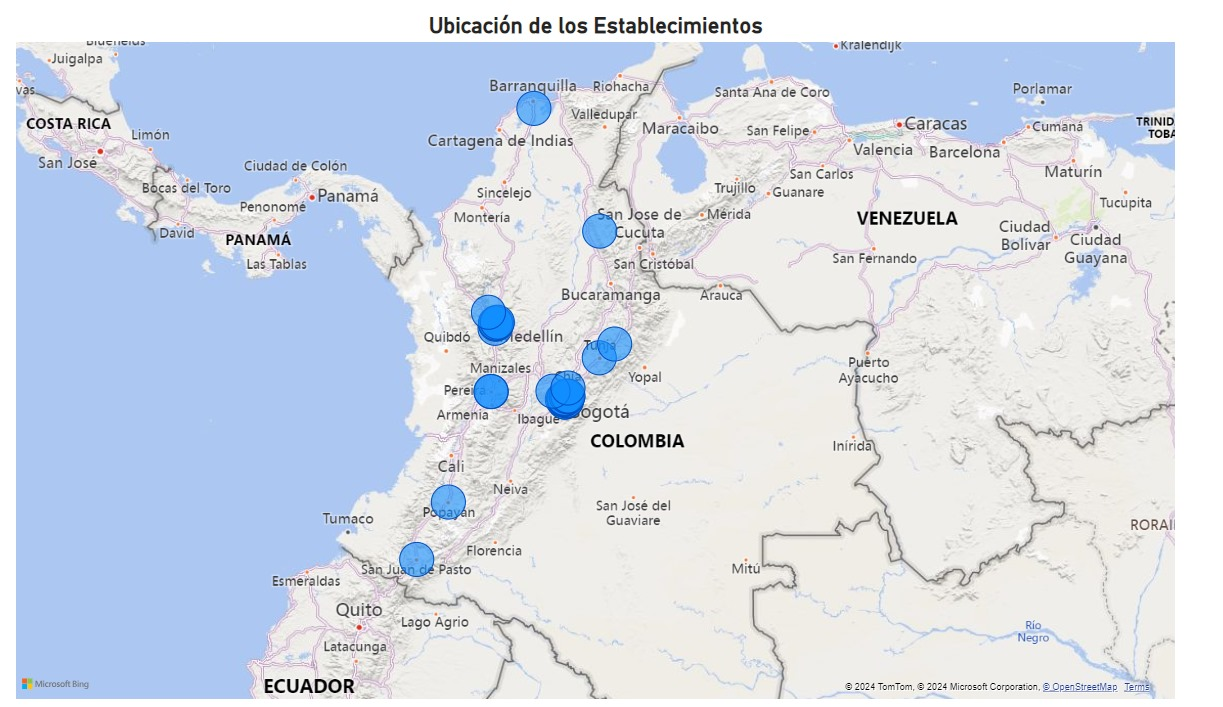

In [ ]:
df_means = df_consumo.groupby('salesforceName').mean()
df_means

<ipython-input-18-89421b686251>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_means = df_consumo.groupby('salesforceName').mean()


,consumo_real,CREF_ORG,EG,AJUSTES_CREF,CREF,consumo_objetivo,indice,indice_abs,prec_tot_h,temp_prom_d
salesforceName,,,,,,,,,,
COLEX1146,608.045138,847.278539,176.892694,0.000000,847.278539,670.385845,0.907008,0.112875,0.526027,27.973226
COLEX1858,306.594143,396.132534,93.789954,0.000000,396.132534,302.342580,1.014062,0.092963,0.526027,18.701132
COLEX2029,81.966128,100.679794,9.470434,0.000000,100.679794,91.209361,0.898659,0.159882,0.526027,16.553586
COLEX2046,42.096905,48.427397,5.903995,2.878653,51.306050,45.402055,0.927203,0.155114,0.575778,20.893873
COLEX2058,111.035834,168.890525,38.731279,-12.669424,156.221102,117.489823,0.945068,0.177997,0.770362,13.081367
COLEX2062,82.828876,116.106050,11.759703,0.000000,116.106050,104.346347,0.793788,0.212427,1.057733,16.201422
COLEX2074,56.035518,64.109589,3.589384,0.000000,64.109589,60.520205,0.925898,0.177105,1.695937,16.553586
COLEX2075,154.211227,167.129909,14.673744,0.000000,167.129909,152.456164,1.011512,0.212268,1.520570,17.756723
COLEX2081,491.257687,687.949772,176.472945,37.676920,725.626692,549.153747,0.894572,0.169423,0.616526,15.434975


La anteior tabla muestra el consumo objetivo y real por cada establecimiento, en esta se demuestra una gran variabilidad entre los datos.

In [ ]:
df_consumo.kurt(numeric_only=True)

consumo_real         5.520225
CREF_ORG             5.339811
EG                   3.484753
AJUSTES_CREF         5.382854
CREF                 5.047311
consumo_objetivo     5.508169
indice               3.864487
indice_abs          20.621125
prec_tot_h          31.445918
temp_prom_d          3.811895
dtype: float64

In [ ]:
df_consumo.skew(numeric_only=True)

consumo_real        2.420758
CREF_ORG            2.408236
EG                  2.086459
AJUSTES_CREF        2.028082
CREF                2.376089
consumo_objetivo    2.446507
indice             -0.171875
indice_abs          1.850381
prec_tot_h          4.614122
temp_prom_d         1.241447
dtype: float64

De acuerdo con el analisis de forma de curtosis se llega a la conclusión que los datos de los consumos estan muy centrados en su media con curtosis positivas, lo que deja entender que se tratan de distribuciones leptocurticas, por otro lado, la asimetria de los datos estan mayormente concentrados a la izquierda de la media por lo que se trata de una asimetria positiva.

In [ ]:
df_consumo.var(numeric_only=True)

consumo_real        19429.253014
CREF_ORG            34618.985280
EG                   2187.243432
AJUSTES_CREF           94.267702
CREF                36542.924583
consumo_objetivo    21247.500141
indice                  0.041200
indice_abs              0.016671
prec_tot_h              2.497222
temp_prom_d             8.273950
dtype: float64

La varianza de los datos presentan valores muy notables en los consumos, esto es debido a lo mencionado anteriormente de las diversas necesidades energeticas de los establecimientos.

In [ ]:
df_consumo['consumo_real'].corr(df_consumo['consumo_objetivo']).round(3)

0.968

La correlación presentada entre los consumos muestran que estos tienen una correlación cerca a 1, esto tiene sentido dado que a medida que aumenta el consumo real se reajusta el consumo objetivo.

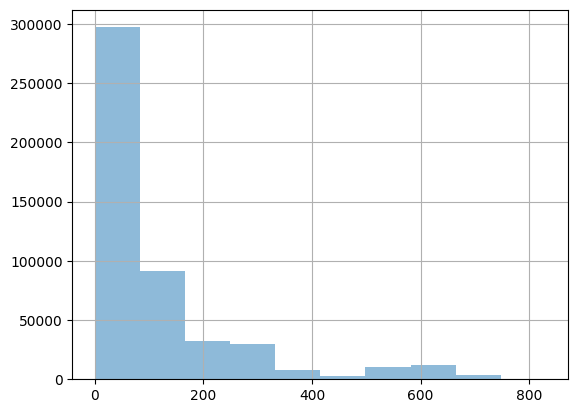

In [ ]:
df_consumo['consumo_real'].hist(alpha = 0.5);

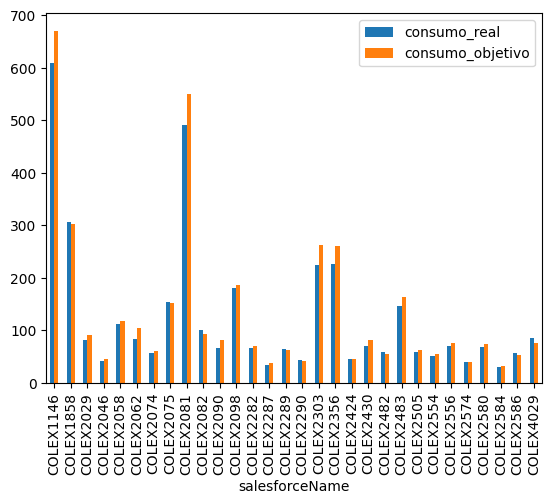

In [ ]:
df_means.plot.bar(y = ['consumo_real', 'consumo_objetivo']);

El histograma de la variable consumo_real muestra que la mayoria de los establecimientos tienen consumos entre 0 y 200 kWh, siendo pocos los almacenes que requieren mayor cantidad de energia sobre este rango, esto tambien concuerda con la curtosis y la simetria positiva encontrada anteriormente.

Por otro lado la grafica de barras muestra las necesidades enegeticas de los establecimientos, en esta grafica se puede ver que como se encontro en el histograma la mayoria de almacenes estan en un rango de 0 y 200 kWh, y que solamente 5 de estos requieren mayores cantidades de energia.

### **4.3. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?

Se encuentran datos ausentes en la columna consumo real, lo que provoca ausencia de datos en otras columnas derivadas, además por sí misma el valor de consumo real puede presentar problemas pues esta cambia por factores externos como ampliación del centro de consumo.

- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?

No, todas las representaciones eran entendibles solo con problemas de formato

- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?

Al principio unas columnas estaban separadas en el decimal por comas y otras por puntos, también algunos tenían puntuación decimal lo cual generaba conflictos. Otro aspecto importante era el manejo de las series de tiempo, que representó un desafío para su manipulación debido a que podían repetirse estampas

- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

Si se observan valores atípicos, pero a medida que la escala de tiempo aumenta estos se reducen, esto es debido a que los consumos presentan variaciones altas dependiendo de la operación de los proyectos. En los pasos previos a cargar el conjunto de datos se realizaron limpiezas de los valores corruptos y faltantes, eliminandolos.

#### **4.4. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?

No, se busca la correlación entre la temperatura ambiente y el cumplimiento con el objetivo de consumo (indice, indice_abs), es decir como las condiciones ambientales influyen sobre el consumo real del proyecto y como pueden impactar al cumplimiento de las metas de ahorro.

- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

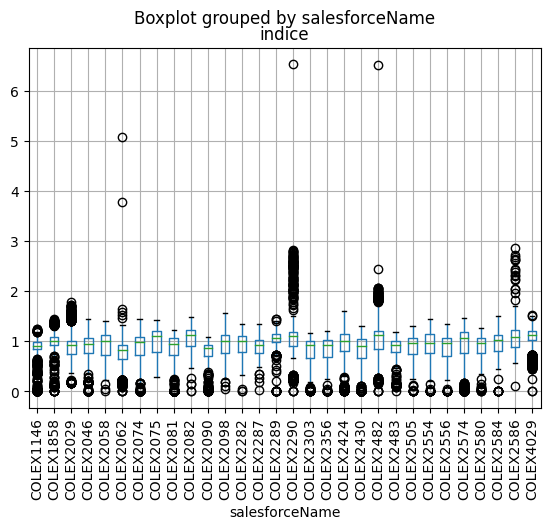

In [ ]:
#Realizamos un boxplot para identificar
boxplot = df_consumo.boxplot(by='salesforceName',column='indice')
plt.xticks(rotation=90)
plt.show()


Como podemos observar en el anterior boxplot se evidencian varios datos atípicos. Esto corresponde a que el consumo de referencia y la meta de ahorro son valores anuales en kWh, que se dividieron por el número de horas del año para tener el objetivo de consumo por hora, sin embargo es un valor promedio y dependiendo de la hora del día el consumo puede varíar en gran medida debido a la operación, por lo que aumentaremos la escala de tiempo para ver como cambia la dispersión y valores atipicos agrupando por día y por mes.

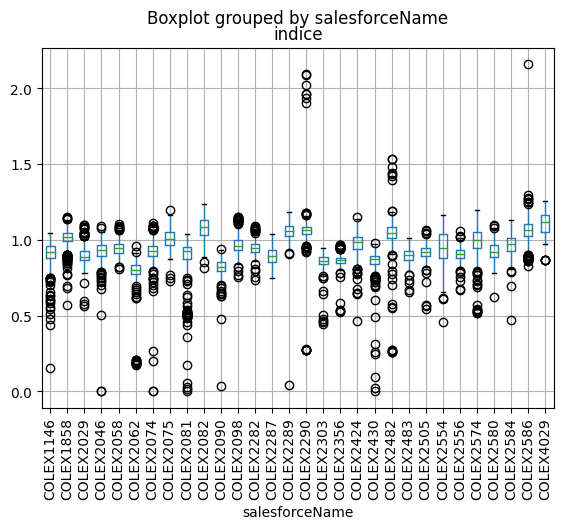

In [ ]:
df_consumo['date'] = pd.to_datetime(df_consumo['date'])

# Agrupar por fecha y salesforceName, y calcular estadísticas para cada campo
df_consumo_diario = df_consumo.groupby(['date', 'salesforceName']).agg({
    'consumo_real': 'mean',
    'CREF_ORG': 'mean',
    'EG': 'mean',
    'AJUSTES_CREF': 'mean',
    'CREF': 'mean',
    'consumo_objetivo': 'mean',
    'indice': 'mean',
    'indice_abs': 'mean',
    'prec_tot_h': 'mean',
    'temp_prom_d': 'mean'
}).reset_index()
boxplot = df_consumo_diario.boxplot(by='salesforceName',column='indice')
plt.xticks(rotation=90)
plt.show()


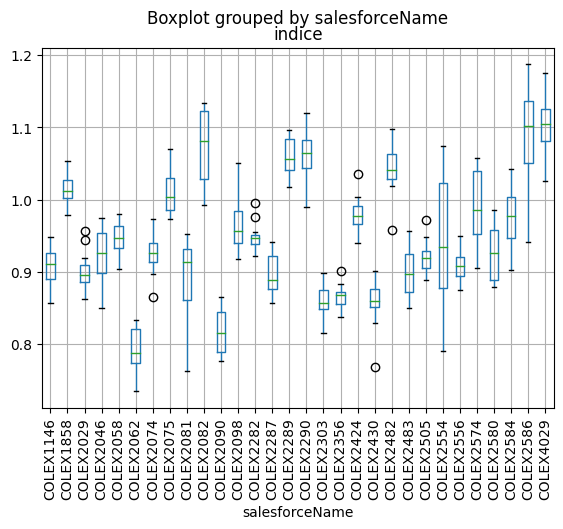

In [ ]:
df_consumo['date'] = pd.to_datetime(df_consumo['date'])
# Agrupar por mes y salesforceName, y calcular estadísticas para cada campo
df_consumo_mensual = df_consumo.groupby([pd.Grouper(key='date', freq='M'), 'salesforceName']).agg({
    'consumo_real': 'mean',
    'CREF_ORG': 'mean',
    'EG': 'mean',
    'AJUSTES_CREF': 'mean',
    'CREF': 'mean',
    'consumo_objetivo': 'mean',
    'indice': 'mean',
    'indice_abs': 'mean',
    'prec_tot_h': 'mean',
    'temp_prom_d': 'mean'
}).reset_index()

boxplot = df_consumo_mensual.boxplot(by='salesforceName',column='indice')
plt.xticks(rotation=90)
plt.show()


Como se puede observar cuando trabajamos con consumos mensuales, los valores atípicos en el indice de cumplimiento se reducen notablemente.



## **5. Limpieza de los Datos**
---


Se identifico valores faltantes unicamente en la columna de consumo real, debido a que otras columnas utilizan esta para base de algunos calculos, donde se tiene valores faltantes en consumo real tambien esta en la estas columnas. La mayoria de los valores faltantes de los establecimientos son valores debajo de los 2000 y por la gran cantidad de datos disponibles estos se pueden eliminar sin afectar los resultados generales, sin embargo, hay 4 que presentan una alta cantidad de valores faltantes los cuales al eliminar pueden afectar los analisis.

Notamos que, aunque la mayoría de datos faltantes corresponden a 2022 es porque hay un pequeño número de lugares con demasiados valores faltantes para dicho año, sin embargo lo más usual entre todos los puntos es que haya valores faltantes en el año 2023

26068
11263


<AxesSubplot:xlabel='salesforceName'>

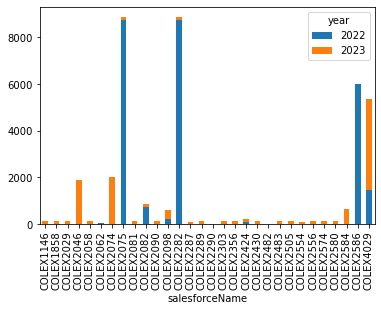

In [ ]:
# ---INGRESE SU CÓDIGO---
#Valores faltantes por variable
df_datos_nan = df_consumo.copy()
df_datos_nan.isna().sum()

df_datos_nan['datetime'] = pd.to_datetime(df_datos_nan['datetime'])
print(df_datos_nan[df_datos_nan['datetime'].dt.year == 2022]['consumo_real'].isna().sum())
print(df_datos_nan[df_datos_nan['datetime'].dt.year == 2023]['consumo_real'].isna().sum())
df_datos_nan['year'] = df_datos_nan['datetime'].dt.year
nan_por_lugar_año = df_datos_nan.groupby(['salesforceName', 'year']).apply(lambda x: x.isna().sum()).sort_values(by=["consumo_real"], ascending=False).unstack()
nan_por_lugar_año['consumo_real'].plot(kind="bar", stacked=True)

In [ ]:
# Por cada establecimiento
for punto in df_consumo['salesforceName'].unique():
    faltantes = df_consumo[df_consumo.isna().any(axis=1)]
    faltantes = faltantes[faltantes['salesforceName'] == punto]
    completo = df_consumo[df_consumo['salesforceName']==punto]
    print(punto, 'valores faltantes: ',str(round(100*faltantes.shape[0]/completo.shape[0], 2))+'%')

COLEX1858 valores faltantes:  0.68%
COLEX2046 valores faltantes:  10.68%
COLEX2082 valores faltantes:  4.93%
COLEX2090 valores faltantes:  0.68%
COLEX2098 valores faltantes:  3.38%
COLEX2290 valores faltantes:  0.0%
COLEX2356 valores faltantes:  0.68%
COLEX2483 valores faltantes:  0.68%
COLEX2075 valores faltantes:  50.68%
COLEX2282 valores faltantes:  50.68%
COLEX2029 valores faltantes:  0.68%
COLEX2505 valores faltantes:  0.68%
COLEX2556 valores faltantes:  0.68%
COLEX2287 valores faltantes:  0.45%
COLEX2424 valores faltantes:  1.16%
COLEX2074 valores faltantes:  11.51%
COLEX2062 valores faltantes:  0.27%
COLEX2430 valores faltantes:  0.68%
COLEX2058 valores faltantes:  0.68%
COLEX2584 valores faltantes:  3.56%
COLEX2554 valores faltantes:  0.41%
COLEX2289 valores faltantes:  0.68%
COLEX2303 valores faltantes:  0.68%
COLEX2081 valores faltantes:  0.68%
COLEX1146 valores faltantes:  0.82%
COLEX2580 valores faltantes:  0.68%
COLEX2574 valores faltantes:  0.68%
COLEX2482 valores faltant

### **5.2. Valores duplicados**
----

No hay valores duplicados

In [ ]:
# ---Identificación de valores duplicados---
df_consumo['index'] = df_consumo['index'].astype(str)
df_consumo['salesforceName'] = df_consumo['salesforceName'].astype(str)
df_consumo['SFN_FECHA'] = df_consumo['salesforceName'] + '_' +  df_consumo['index']
conteo_agrupado = df_consumo.groupby('salesforceName')['SFN_FECHA'].value_counts()
conteo_agrupado
conteo_agrupado.max()

1

### **5.3. Valores atípicos**
---


Los valores atipicos presentan información valida, sin embargo, no es comun. Para tratar los valores atipicos se decidio trabjar los datos en el rango de horas donde se presenta menor variabilidad de acuerdo al histograma mostrado, este rango seria aproximadamente de 5 am a 8 pm.

In [ ]:
df_consumo['index'] = pd.to_datetime(df_consumo['index'])
df_consumo['hora'] = df_consumo['index'].dt.time
df_consumo['hora_entero'] = df_consumo['hora'].apply(lambda x: x.hour)
df_consumo

,Unnamed: 0,datetime,salesforceName,consumo_real,CREF_ORG,EG,AJUSTES_CREF,CREF,consumo_objetivo,indice,indice_abs,index,prec_tot_h,date,temp_prom_d,SFN_FECHA,hora,hora_entero
0,0,2022-01-10 00:00:00,COLEX1858,294.40,396.132534,93.789954,0.0,396.132534,302.342580,0.973730,0.026270,2022-01-10 00:00:00,0.386989,2022-01-10,18.794123,COLEX1858_2022-01-10 00:00,00:00:00,0
1,1,2022-01-10 01:00:00,COLEX1858,283.84,396.132534,93.789954,0.0,396.132534,302.342580,0.938803,0.061197,2022-01-10 01:00:00,0.257921,2022-01-10,18.794123,COLEX1858_2022-01-10 01:00,01:00:00,1
2,2,2022-01-10 02:00:00,COLEX1858,256.00,396.132534,93.789954,0.0,396.132534,302.342580,0.846722,0.153278,2022-01-10 02:00:00,0.117856,2022-01-10,18.794123,COLEX1858_2022-01-10 02:00,02:00:00,2
3,3,2022-01-10 03:00:00,COLEX1858,306.08,396.132534,93.789954,0.0,396.132534,302.342580,1.012362,0.012362,2022-01-10 03:00:00,0.051633,2022-01-10,18.794123,COLEX1858_2022-01-10 03:00,03:00:00,3
4,4,2022-01-10 04:00:00,COLEX1858,264.00,396.132534,93.789954,0.0,396.132534,302.342580,0.873182,0.126818,2022-01-10 04:00:00,0.033447,2022-01-10,18.794123,COLEX1858_2022-01-10 04:00,04:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,525595,2023-09-30 19:00:00,COLEX4029,103.88,81.807534,5.248516,0.0,81.807534,76.559018,1.356862,0.356862,2023-09-30 19:00:00,0.033541,2023-09-30,20.325892,COLEX4029_2023-09-30 19:00,19:00:00,19
525596,525596,2023-09-30 20:00:00,COLEX4029,98.00,81.807534,5.248516,0.0,81.807534,76.559018,1.280058,0.280058,2023-09-30 20:00:00,0.126922,2023-09-30,20.325892,COLEX4029_2023-09-30 20:00,20:00:00,20
525597,525597,2023-09-30 21:00:00,COLEX4029,79.56,81.807534,5.248516,0.0,81.807534,76.559018,1.039198,0.039198,2023-09-30 21:00:00,0.077704,2023-09-30,20.325892,COLEX4029_2023-09-30 21:00,21:00:00,21
525598,525598,2023-09-30 22:00:00,COLEX4029,62.08,81.807534,5.248516,0.0,81.807534,76.559018,0.810878,0.189122,2023-09-30 22:00:00,0.026849,2023-09-30,20.325892,COLEX4029_2023-09-30 22:00,22:00:00,22


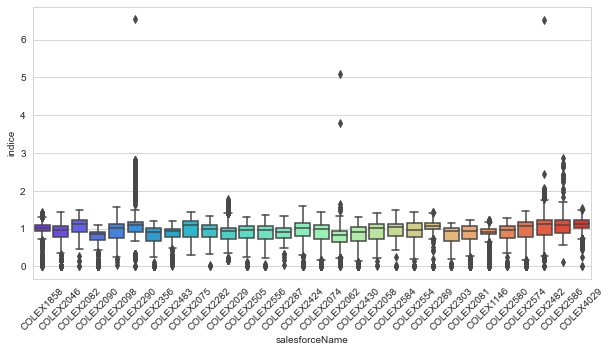

In [ ]:
#Realizamos un boxplot para identificar valores atipicos en los datos hora a hora
plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x=df_consumo['salesforceName'], y=df_consumo['indice'], palette='rainbow')
sns.set_style('darkgrid')
plt.xticks(rotation=45);

In [ ]:
q1 = df_consumo.groupby('salesforceName')['indice'].quantile(0.25)
q3 = df_consumo.groupby('salesforceName')['indice'].quantile(0.75)
iqr = q3 - q1

# Calcula los límites superior e inferior del rango intercuartílico (IQR)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtra los valores atípicos en un nuevo DataFrame
outliers = pd.DataFrame()
for group, data in df_consumo.groupby('salesforceName'):
    mask = (data['indice'] < lower_bound[group]) | (data['indice'] > upper_bound[group])
    outliers = pd.concat([outliers, data[mask]])
outliers

,Unnamed: 0,datetime,salesforceName,consumo_real,CREF_ORG,EG,AJUSTES_CREF,CREF,consumo_objetivo,indice,indice_abs,index,prec_tot_h,date,temp_prom_d,SFN_FECHA,hora,hora_entero
53447,53447,2022-10-19 23:00:00,COLEX1146,388.80,847.278539,176.892694,0.0,847.278539,670.385845,0.579965,0.420035,2022-10-19 23:00:00,4.358482,2022-10-19,28.512720,COLEX1146_2022-10-19 23:00,23:00:00,23
53448,53448,2022-10-20 00:00:00,COLEX1146,248.64,847.278539,176.892694,0.0,847.278539,670.385845,0.370891,0.629109,2022-10-20 00:00:00,4.226303,2022-10-20,28.795099,COLEX1146_2022-10-20 00:00,00:00:00,0
53449,53449,2022-10-20 01:00:00,COLEX1146,234.96,847.278539,176.892694,0.0,847.278539,670.385845,0.350485,0.649515,2022-10-20 01:00:00,3.269291,2022-10-20,28.795099,COLEX1146_2022-10-20 01:00,01:00:00,1
53450,53450,2022-10-20 02:00:00,COLEX1146,236.88,847.278539,176.892694,0.0,847.278539,670.385845,0.353349,0.646651,2022-10-20 02:00:00,2.591228,2022-10-20,28.795099,COLEX1146_2022-10-20 02:00,02:00:00,2
53451,53451,2022-10-20 03:00:00,COLEX1146,237.36,847.278539,176.892694,0.0,847.278539,670.385845,0.354065,0.645935,2022-10-20 03:00:00,2.544880,2022-10-20,28.795099,COLEX1146_2022-10-20 03:00,03:00:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525574,525574,2023-09-29 22:00:00,COLEX4029,55.04,81.807534,5.248516,0.0,81.807534,76.559018,0.718922,0.281078,2023-09-29 22:00:00,0.286138,2023-09-29,20.511225,COLEX4029_2023-09-29 22:00,22:00:00,22
525575,525575,2023-09-29 23:00:00,COLEX4029,55.92,81.807534,5.248516,0.0,81.807534,76.559018,0.730417,0.269583,2023-09-29 23:00:00,0.262105,2023-09-29,20.511225,COLEX4029_2023-09-29 23:00,23:00:00,23
525579,525579,2023-09-30 03:00:00,COLEX4029,54.76,81.807534,5.248516,0.0,81.807534,76.559018,0.715265,0.284735,2023-09-30 03:00:00,0.058043,2023-09-30,20.325892,COLEX4029_2023-09-30 03:00,03:00:00,3
525580,525580,2023-09-30 04:00:00,COLEX4029,55.64,81.807534,5.248516,0.0,81.807534,76.559018,0.726760,0.273240,2023-09-30 04:00:00,0.047126,2023-09-30,20.325892,COLEX4029_2023-09-30 04:00,04:00:00,4


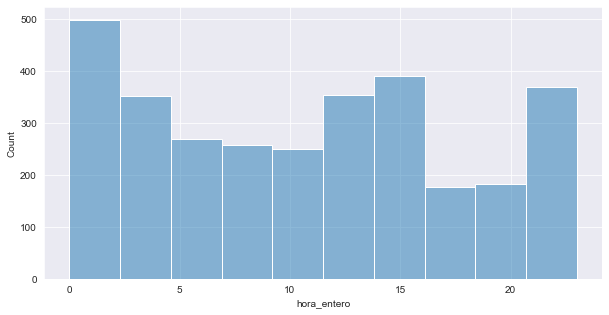

In [ ]:
#outliers['hora_entero'].hist(alpha = 0.5)
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(outliers['hora_entero'], bins=10, alpha=0.5);

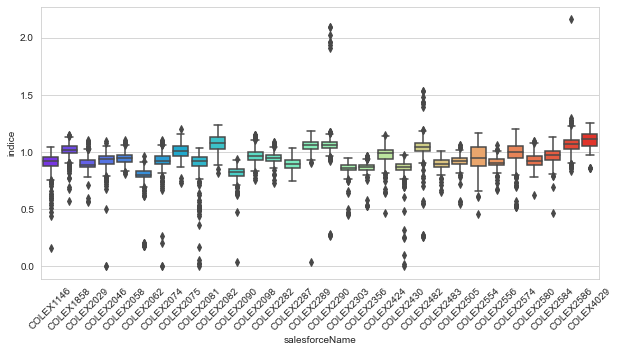

In [ ]:
#Realizamos un boxplot para identificar valores atipicos en los datos día a día
df_consumo['date'] = pd.to_datetime(df_consumo['date'])
df_consumo_diario = df_consumo.groupby(['date', 'salesforceName']).agg({
    'consumo_real': 'mean',
    'CREF_ORG': 'mean',
    'EG': 'mean',
    'AJUSTES_CREF': 'mean',
    'CREF': 'mean',
    'consumo_objetivo': 'mean',
    'indice': 'mean',
    'indice_abs': 'mean',
    'prec_tot_h': 'mean',
    'temp_prom_d': 'mean'
}).reset_index()
#boxplot = df_consumo_diario.boxplot(by='salesforceName',column='indice')
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
boxplot2 = sns.boxplot(data=df_consumo_diario, x='salesforceName', y='indice', palette='rainbow')
plt.xticks(rotation=45);

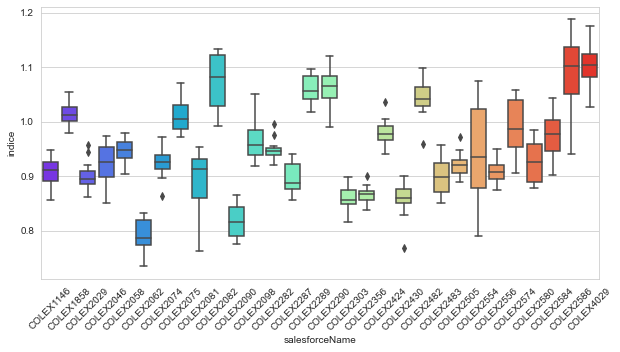

In [ ]:
#Realizamos un boxplot para identificar valores atipicos en los datos mes a mes
df_consumo['date'] = pd.to_datetime(df_consumo['date'])
df_consumo_mensual = df_consumo.groupby([pd.Grouper(key='date', freq='M'), 'salesforceName']).agg({
    'consumo_real': 'mean',
    'CREF_ORG': 'mean',
    'EG': 'mean',
    'AJUSTES_CREF': 'mean',
    'CREF': 'mean',
    'consumo_objetivo': 'mean',
    'indice': 'mean',
    'indice_abs': 'mean',
    'prec_tot_h': 'mean',
    'temp_prom_d': 'mean'
}).reset_index()

#boxplot = df_consumo_mensual.boxplot(by='salesforceName',column='indice')
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
boxplot2 = sns.boxplot(data=df_consumo_mensual, x='salesforceName', y='indice', palette='rainbow')
plt.xticks(rotation=45);

### **5.4. Datos Inconsistentes**
---


Varias inconsistencias importantes presentadas fueron debido a un error de formato donde varias variables numericas estaban en formatos de comas (,) por lo cual se recibia como string, se tuvo que realizar un cambio de este formato para poder realizar los analisis deseados.

## **6. Análisis y resultados**


Se conservaron las variables numéricas temperatura precipitacióna total debido a que son variables meteorológicas que sospechamos están relacionadas con el consumo. Y consumo real, indice, indice absoluto debido a que son indicadores del consumo en el lugar, las demás variables no representan algo significativo para nuestro trabajo

In [ ]:
#df_consumo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_proyecto.csv')
df_consumo = pd.read_csv('datos_proyecto.csv')
#df_consumo = df_consumo[['consumo_real', 'prec_tot_h', 'temp_prom_d', 'indice', 'indice_abs', 'datetime', 'salesforceName']]
df_consumo['datetime'] = pd.to_datetime(df_consumo['datetime'])
df_consumo = df_consumo.dropna()
horas = list(range(5,21))                                                       #Rango de horas desde las 5 am hasta las 8pm
df_consumo = df_consumo[df_consumo['datetime'].dt.hour.isin(horas)]

df_consumo['index'] = pd.to_datetime(df_consumo['index'])
df_consumo['hora'] = df_consumo['index'].dt.time
df_consumo['hora_entero'] = df_consumo['hora'].apply(lambda x: x.hour)



df_consumo['date'] = pd.to_datetime(df_consumo['date'])

# Crear la columna "year" con el año como número entero
df_consumo['year'] = df_consumo['date'].apply(lambda x: x.year)

# Crear la columna "month" con el número del mes
df_consumo['month'] = df_consumo['date'].apply(lambda x: x.month)

# Crear la columna "year_month" con el año y el mes concatenados
df_consumo['year_month'] = df_consumo['date'].apply(lambda x: str(x.year) + '-' + str(x.month).zfill(2))

# Convertir la columna 'hora_entero' a cadena para poder concatenarla
df_consumo['hora_entero'] = df_consumo['hora_entero'].astype(str)

# Convertir la columna 'date' a cadena y luego concatenarla con 'hora_entero' para crear 'fecha-hora'
df_consumo['fecha-hora'] = df_consumo['date'].dt.strftime('%Y-%m-%d') + '-' + df_consumo['hora_entero']


def quitar_atipicos(punto): #Quita los datos atípicos de indice_abs por cada punto de consumo
    q1 = punto['indice_abs'].quantile(0.25)
    q3 = punto['indice_abs'].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5*iqr
    lim_sup = q3 + 1.5*iqr
    return punto[(punto['indice_abs'] >= lim_inf) & (punto['indice_abs'] <= lim_sup)]
df_consumo = df_consumo.groupby('salesforceName').apply(quitar_atipicos)
df_consumo.reset_index(drop=True, inplace=True)

df_consumo['indice_normalizado'] = df_consumo.groupby('salesforceName')['indice'].transform(lambda x: (x-x.mean())/x.std())

### **6.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.
- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.
- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?


In [ ]:
df_consumo_d = df_consumo.groupby([pd.Grouper(key='datetime', freq='D'), 'salesforceName']).agg({
    'consumo_real': 'mean',
    'indice': 'mean',
    'indice_abs': 'mean',
    'prec_tot_h': 'mean',
    'temp_prom_d': 'mean',
    'indice_normalizado' : 'mean'
}).reset_index()

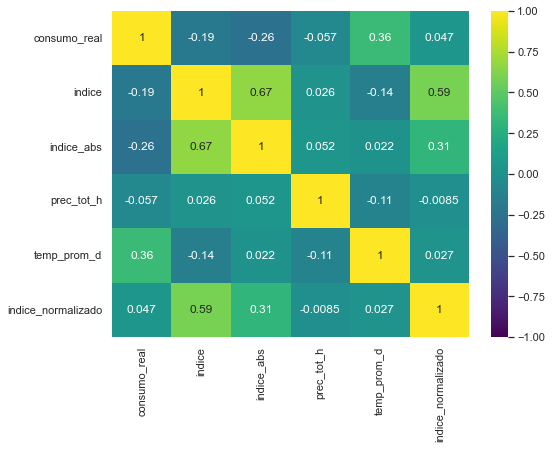

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_consumo_d.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True);

Notamos que el consumo real y la temperatura tienen una ligera correlación, que además es positiva, lo cual es acorde a nuestra idea de que a mayor temperatura mayor consumo de energía debido al consumo por refrigeración. Otra correlación interesante es entre la temperatura y la precipitación, que a pesar de no ser muy significativa (-0.11) su signo nos indica que hemos llevado correctamente la selección de datos, pues es lógico que entre más llueva menor sea la temperatura (correlación inversa)

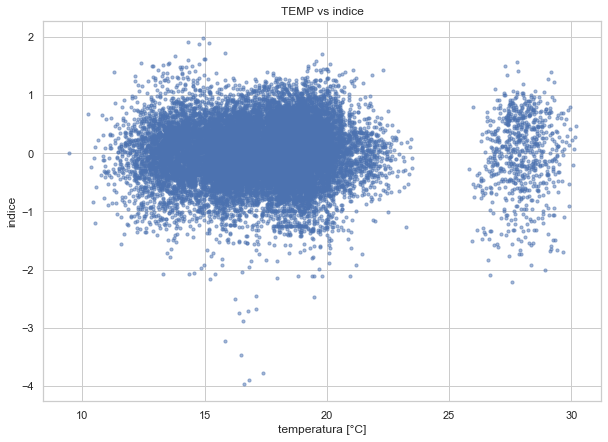

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(df_consumo_d['temp_prom_d'], df_consumo_d['indice_normalizado'],  alpha=0.5, s=10)
plt.ylabel('indice')
plt.xlabel('temperatura [°C]')
plt.title('TEMP vs indice')
plt.show()

Notamos 2 cúmulos de datos, esto se da debido a que los datos obtenidos se distribuyen geográficamente en dos grupos principales: andino y costa. Los puntos andinos (como Bogotá y Boyacá) tienen temperaturas promedio cercanas a 16°C, mientras que las de la costa cercanas a 28°C, no se analizan lugares cuya temperatura promedio diaria llegue a los 25°

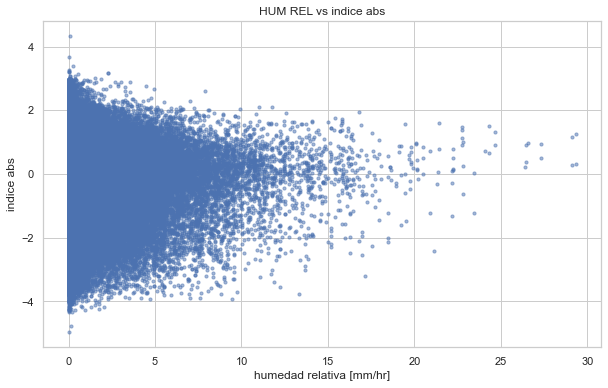

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df_consumo['prec_tot_h'], df_consumo['indice_normalizado'], alpha=0.5, s=10)
plt.ylabel('indice abs')
plt.xlabel('humedad relativa [mm/hr]')
plt.title('HUM REL vs indice abs')
plt.show()

In [ ]:
pend, interc, corr, p_valor, error_std = stats.linregress(df_consumo['prec_tot_h'], df_consumo['indice_normalizado'])

print(f"pend = {pend:10f}")
print(f"interc = {interc:10f}")
print(f"corr = {corr:10f}")
print(f"p_valor = {p_valor:10f}")
print(f"error_std = {error_std:10f}")

pend =  -0.048115
interc =   0.033456
corr =  -0.067457
p_valor =   0.000000
error_std =   0.001271


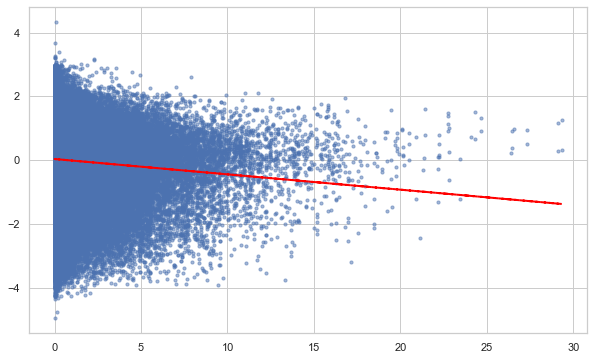

In [ ]:
df_reg = df_consumo.copy()

df_reg['reg'] = df_reg['prec_tot_h']*pend + interc


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_reg['prec_tot_h'], df_reg['indice_normalizado'], alpha=0.5, s=10);
ax.plot(df_reg['prec_tot_h'], df_reg['reg'], color = 'red', lw = 2, ls = '-.');


En el anterior grafico observamos una tendencia de que a mayor precipitación, el indice absoluto mejora, sin embargo, debido a una cantidad grande de datos atipicos una regresión lineal no es precisa para represnetar este evento. Realizaremos un análisis del índice vs hora vs precipitación.

Agruparemos el indice promedio para todos los proyectos hora a hora, así como su respectivo promedio de precipitación:

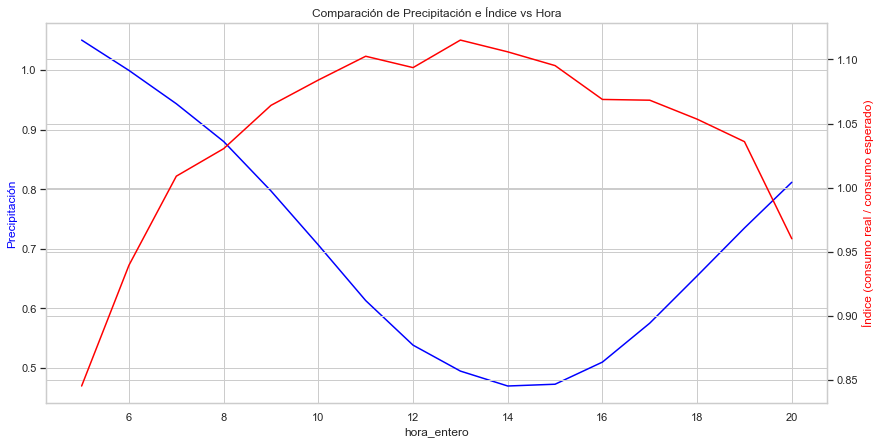

In [ ]:
df_precipitacion = df_consumo.groupby('hora_entero')['prec_tot_h'].mean().reset_index()
df_precipitacion['hora_entero'] = pd.to_numeric(df_precipitacion['hora_entero'])


df_indice = df_consumo.groupby('hora_entero')['indice'].mean().reset_index()
df_indice['hora_entero'] = pd.to_numeric(df_indice['hora_entero'])


df_precipitacion_sorted = df_precipitacion.sort_values('hora_entero')
df_indice_sorted = df_indice.sort_values('hora_entero')


sns.set(style="whitegrid")


plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_precipitacion_sorted, x='hora_entero', y='prec_tot_h', color='blue')
ax.set_ylabel('Precipitación', color='blue')


ax2 = ax.twinx()
sns.lineplot(data=df_indice_sorted, x='hora_entero', y='indice', color='red', ax=ax2)
ax2.set_ylabel('Índice (consumo real / consumo esperado)', color='red')


plt.title('Comparación de Precipitación e Índice vs Hora')
plt.xlabel('Hora')
plt.show()


Notamos una relación con el indice y la precipitación de forma inversa, y su comportamiento hora a hora.

   hora_entero  prec_tot_h    indice  indice_normalizado
0           10    0.706110  1.083948            0.330062
1           11    0.612724  1.102488            0.511105
2           12    0.537873  1.093632            0.446301
3           13    0.494304  1.115101            0.621614
4           14    0.469244  1.105924            0.542630
5           15    0.472232  1.095194            0.451928
6           16    0.509401  1.068805            0.215934
7           17    0.574829  1.068215            0.241681
8           18    0.654177  1.053431            0.131398
9           19    0.734619  1.035886           -0.042855
10          20    0.811448  0.960183           -0.748581
11           5    1.050273  0.845344           -1.844964
12           6    0.999276  0.939562           -1.014479
13           7    0.943350  1.008968           -0.397055
14           8    0.879890  1.030440           -0.184872
15           9    0.796798  1.064212            0.136169


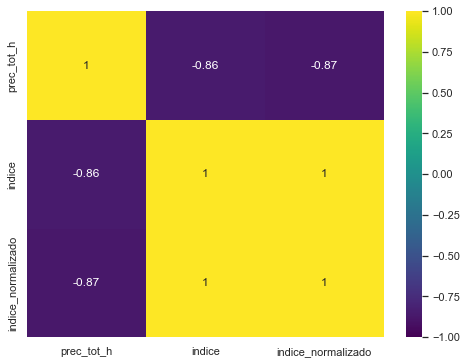

In [ ]:
# Agrupar por 'hora_entero' y calcular los valores promedio de 'prec_tot_h', 'indice' e 'indice normalizado'
df_promedio = df_consumo.groupby('hora_entero').agg({'prec_tot_h': 'mean', 'indice': 'mean', 'indice_normalizado': 'mean'}).reset_index()

# Mostrar el DataFrame resultante
print(df_promedio)
plt.figure(figsize=(8, 6))
sns.heatmap(df_promedio.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True);

Aquí observamos una correlación fuerte negativa entre la precipitación y el índice, a mayor precipitación el indice es mejor, es decir, el consumo real se reduce, esto tiene sentido ya que con mayor precipitación la temperatura se reduce, reduciendo la carga térmica en los proyectos y necesitando menos energía para refrigeración alimentaria y aire acondicionado.

In [ ]:
consumo_perf = df_consumo.copy()
df_quant = pd.DataFrame()
punto = 'COLEX2090'
parame = 'consumo_real'
df_quant['hour'] = consumo_perf[consumo_perf['salesforceName'] == punto]['datetime'].dt.hour
df_quant['minute'] = consumo_perf[consumo_perf['salesforceName'] == punto]['datetime'].dt.minute
df_quant[parame] = consumo_perf[consumo_perf['salesforceName'] == punto][parame]

q_50 = df_quant.groupby(["hour", "minute"]).mean()
q_50df = q_50.reset_index()
q_50df['TIMESTAMP'] = pd.to_datetime(q_50df['hour'].astype(str)+':'+q_50df['minute'].astype(str), format='%H:%M')
q_50df.index = q_50df['TIMESTAMP']

q_10 = df_quant.groupby(["hour", "minute"]).quantile(0.1)
q_10df = q_10.reset_index()
q_10df['TIMESTAMP'] = pd.to_datetime(q_10df['hour'].astype(str)+':'+q_10df['minute'].astype(str), format='%H:%M')
q_10df.index = q_10df['TIMESTAMP']

q_90 = df_quant.groupby(["hour", "minute"]).quantile(0.9)
q_90df = q_90.reset_index()
q_90df['TIMESTAMP'] = pd.to_datetime(q_90df['hour'].astype(str)+':'+q_90df['minute'].astype(str), format='%H:%M')
q_90df.index = q_90df['TIMESTAMP']

q_1 = df_quant.groupby(["hour", "minute"]).quantile(0.01)
q_1df = q_1.reset_index()
q_1df['TIMESTAMP'] = pd.to_datetime(q_1df['hour'].astype(str)+':'+q_1df['minute'].astype(str), format='%H:%M')
q_1df.index = q_1df['TIMESTAMP']

q_99 = df_quant.groupby(["hour", "minute"]).quantile(0.99)
q_99df = q_99.reset_index()
q_99df['TIMESTAMP'] = pd.to_datetime(q_99df['hour'].astype(str)+':'+q_99df['minute'].astype(str), format='%H:%M')
q_99df.index = q_99df['TIMESTAMP']

tabla = pd.concat([q_50, q_10, q_90, q_1, q_99], axis=1)
tabla.columns = ['Promedio', 'P10', 'P90', 'P1', 'P99']
tabla

,,Promedio,P10,P90,P1,P99
hour,minute,,,,,
5,0,63.007822,60.333000,66.680001,60.080000,71.1598
6,0,69.951309,64.680001,74.920000,60.780200,78.8776
7,0,73.780181,69.668000,77.904000,63.360800,81.2996
8,0,72.989067,68.376000,77.480000,65.068000,80.6332
9,0,71.687656,68.040000,75.440000,63.648000,78.0960
10,0,73.941900,68.440000,79.800000,62.800000,82.9200
11,0,75.943606,71.520000,80.600000,66.292000,83.4080
12,0,75.165903,70.156000,80.520000,65.590001,83.7600
13,0,74.115146,70.040000,78.080000,66.016000,80.8000


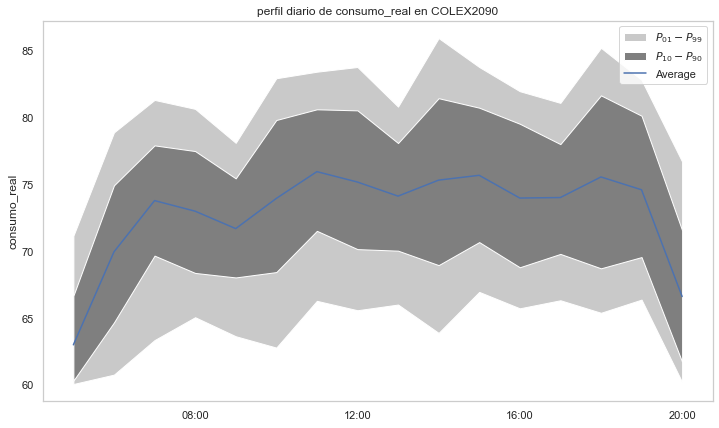

In [ ]:
fig, ax = plt.subplots()

#Grises
grisintenso = '#7F7F7F'
grisligero = '#C9C9C9'

ax.fill_between(q_10df.index, q_1df[parame], q_99df[parame], label='$P_{01}-P_{99}$', facecolor = grisligero)
ax.fill_between(q_10df.index, q_10df[parame], q_90df[parame], label='$P_{10}-P_{90}$', facecolor = grisintenso)
ax.plot(q_50df.index, q_50df[parame], label='Average')

locator = dates.AutoDateLocator(minticks=6, maxticks=6)
formatter = dates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

f = plt.gcf()
#f.set_size_inches(7,9) #trimestral
f.set_size_inches(12,7) #mensual
plt.ylabel(parame)
plt.title('perfil diario de '+parame+' en '+punto)
plt.legend()
plt.grid()
plt.show()

La gráfica anterior nos permite apreciar el comportamiento promedio de alguna variable a lo largo de las horas que se tienen contempladas, así como sus percentiles lo que nos da una idea de su variabilidad. Sabemos que hacia el medio día suelen presentarse las temperaturas más altas por lo que también es una herramienta que nos da nociones de cuánto podría afectar este parámetro.

### **6.2. Análisis de regresiones**
---
No fue posible llevar una analisis de regresiones debido a que estos no llegaban a datos significativos, este es muy sensible a los datos atipicos por lo que por ejemplo al aumentar la precipitación mejoraba el indice, sin embargo, esto no se vio completamente en la regresión lineal.


### **6.3. Visualizaciones Interactivas**
---


In [ ]:
import plotly.express as px

# Suponiendo que tienes un DataFrame llamado df con las columnas "consumo_real", "hora_entero" y "salesforceName"

# Crear el gráfico interactivo con Plotly Express
fig = px.scatter(df_consumo,x='fecha-hora', y='consumo_real', color='salesforceName',
                 title='Gráfico Interactivo: Consumo Real vs Hora por proyecto (salesforceName)')

# Configurar el modo de selección
fig.update_traces(mode='markers', selector=dict(type='scatter'))

fig.update_xaxes(title_text='Fecha y hora')
fig.update_yaxes(title_text='Consumo Real [kWh]')

# Mostrar el gráfico interactivo
fig.show()

In [ ]:
fig = px.scatter(df_consumo, 'prec_tot_h', 'indice_normalizado', color='salesforceName')#,hover_data="salesforceName")
fig.show()


- Como se puede apreciar, para todos los proyectos analizados el índice promedio, consumo real / consumo objetivo, es mayor en las horas cercanas a medio día.


### **6.4. Visualización de Mapas Coropléticos (Opcional)**
---

In [ ]:
# Importamos folium y algunos plug-ins adicionales que usaremos.
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster

In [ ]:
Bog_lat_long = (4.624335, -74.063644)

In [ ]:
df_coordenada = pd.read_excel("coordenadas bien.xlsx", sheet_name='coordenadas', header=0)
df_coordenada[['Lat', 'Lon']] = df_coordenada['coordenada'].str.split('; ', expand=True)
df_coordenada.drop(columns='coordenada', inplace=True)
df_coordenada['Lat'] = df_coordenada['Lat'].str.replace(',', '.')
df_coordenada['Lon'] = df_coordenada['Lon'].str.replace(',', '.')

df_coordenada.head()

,local,Lat,Lon
0,COLEX1146,10.833906798109139,-74.76815236440581
1,COLEX1858,4.632591843566764,-74.12353586844883
2,COLEX2029,6.29290076528259,-75.55368946373723
3,COLEX2046,8.23366127609779,-73.35420961464338
4,COLEX2058,1.206578974150171,-77.28604438875549


In [ ]:
mapa = folium.Map(location=Bog_lat_long,   # Posición inicial del mapa.
                      zoom_start=6)           # Zoom inicial del mapa.

coordenadas = df_coordenada[['Lat', 'Lon']].values

FastMarkerCluster(name ="Ubicación de los establecimientos" ,
                  data= coordenadas).add_to(mapa)

mapa

Un mapa tipo cluster es ideal debido a que en algunas ciudades se tienen varios establecimientos por lo que se utilizó principalmente para identififcar de mejor manera la cantidad de establecimientos que pueden haber en cada ciudad.

### **6.5. Interpretación de Resultados**
---

Se descubrio que entre las 5 y 20 horas del día, a medida que disminuia la precipitación el indice aumentaba y llegaba a su maximo cuando la precipitación estaba cerca de su minimo. La precipitación y el indice tienen una relación inversa.

Un hallazgo importante es que una precipitación menor a 0.8 el indice esta es menor a 1 que es lo que se busca para la empresa ya que la beneficia, es decir se puede empezar a enfocar en establecimientos donde la precipitación ambiental este debajo de este rango.

Sorpresivamente para la temperatura no se encontró fuerte relación con el indice.

## **7. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1.   Para empezar con el proyecto fue completamente necesario definir primero los aspectos importantes de la información con la que se iba a trabajar, y como esta afecta a la empresa para de esta forma, durante todo el proyecto, tener una mejor visión de lo que se queria trabajar y encontrar.
2.   La estadistica descriptiva nos permitio ver como se distribuian los datos más importantes del dataset, en este pudimos identificar valores atipicos y la cantidad de locales con los que se iban a trabajar, fue un paso necesario para poder identificar de mejor manera la forma de los datos.
3.   La limpieza de los datos fue posiblemente el paso más importante que se tuvo, esto principalmente a que el dataset con el que se trabajo especificamente contenia muchos errores, entre los que se encuentra valores faltantes, y valores atipicos. El mayor reto presentado fue en los valores atipicos, ya que se tuvieron retos en los diferentes locales y las diferentes necesidades energeticas de los mismos, tambien durante las horas de la noche el consumo tenia tendencia a comportarse de de manera bastante diferente entre los establecimientos. Este paso fue fundamental para el desarrollo del proyecto.
4.   Se pudo concluir que la precipitación tiene una correlación inversa al indice y que los indices menores a 1 tienen un rango de precipitación especifico, por otro lado no se encontro grandes diferencias entre el indice y la temperatura, finalmente se pudo construir un mapa coroplético para identificar de mejor manera las ubicaciones de los establecimientos en toda Colombia.



## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*